# TITANIC SURVIVING PREDICTION - KAGGLE ( By Sharyar Virani )

## Problem

### In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

In [1073]:
import pandas as pd

In [971]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Data Analyzing 

In [972]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [973]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [974]:
train.shape

(891, 12)

In [975]:
test.shape

(418, 11)

In [976]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [977]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


#### Missing values of Age and Cabin in both the datasets. Now we will check how many null values are there in the datasets for each.

In [978]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [979]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Visualization

In [980]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()

In [981]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,dead])
    df.index = ['Survivde', 'dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

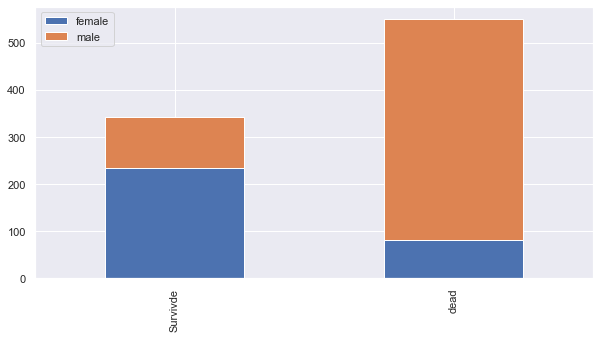

In [982]:
bar_chart('Sex')

#### Females Survived more than males

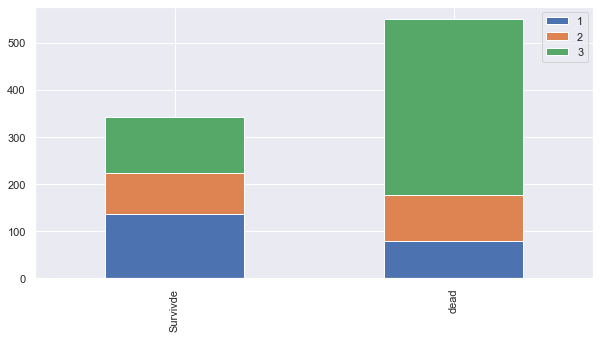

In [983]:
bar_chart('Pclass')

#### 1st class cabin passgeners sruvived more than the 3rd class cabin passengers where as 2nd class passengers ration of sruvival in about half of the total

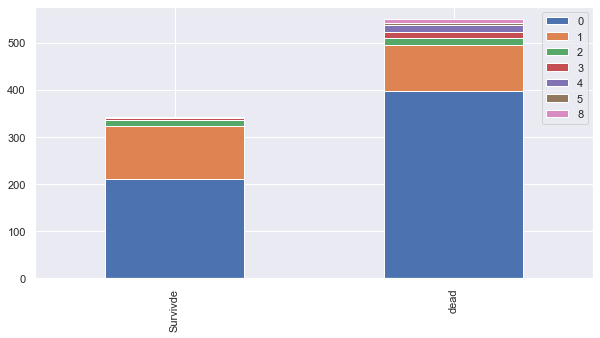

In [984]:
bar_chart('SibSp')

#### Passangers with more than 2 siblings or spouse more likely survived where as passengers with no sibiblings and spouse died more likely

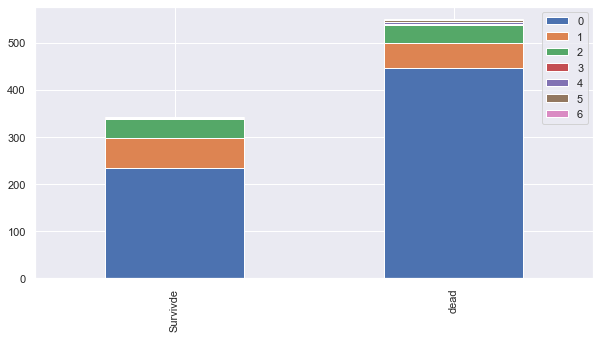

In [985]:
bar_chart('Parch')

#### Passengers with more than 2 childrens or parents survived more likely than the passengers with less than 2 and onwards.

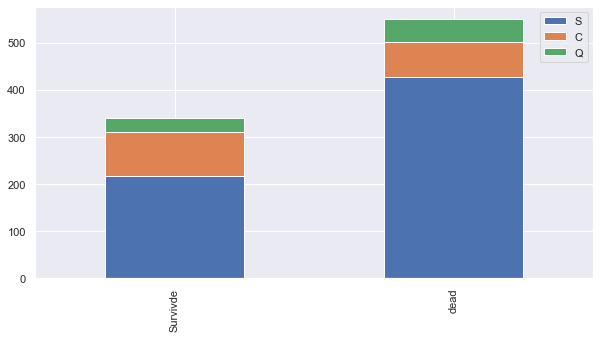

In [986]:
bar_chart('Embarked')

### Feature Engineering

In [987]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Convert String data to Numerical Value

#### Name

In [988]:
train_test_data = [train,test]
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-za-z]+)\.', expand = False)

In [989]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Mme           1
Capt          1
Jonkheer      1
Lady          1
Ms            1
Don           1
Countess      1
Sir           1
Name: Title, dtype: int64

In [990]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

#### Title Mapping [ Mr : 0 , Miss: 1, Mrs: 2, others: 3]

In [991]:
title_mapping = { "Mr": 0,"Miss": 1,"Mrs": 2,
                 "Master": 3,"Rev": 3,"Col": 3,"Ms": 3,"Dr": 3,"Dona": 3,
                 "Lady":3,"Jonkheer":3,"Don":3,"Mme":3,"Countess":3,"Capt":3,"Sir":3, "Mlle":3, "Major":3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [992]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [993]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


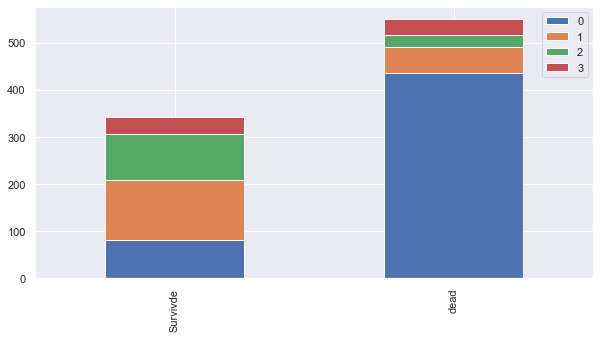

In [994]:
bar_chart('Title')

In [995]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [996]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [997]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


#### Sex [ Male: 0, Female: 1 ]

In [998]:
sex_mapping = {"male":0, "female": 1}
for dataset in train_test_data:
    dataset['Sex']= dataset['Sex'].map(sex_mapping)

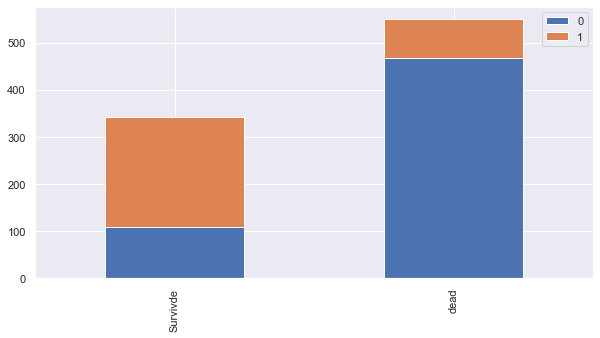

In [999]:
bar_chart('Sex')

#### AGE
##### For age we will take median for missing values in order to replace Null values and mentain the total average value!

In [1000]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [1001]:
train['Age'].fillna(train.groupby('Title')['Age'].transform('median'), inplace=True)
test['Age'].fillna(test.groupby('Title')['Age'].transform('median'), inplace = True)

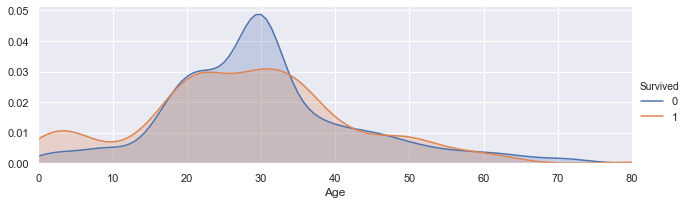

In [1002]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.show()

(0, 20)

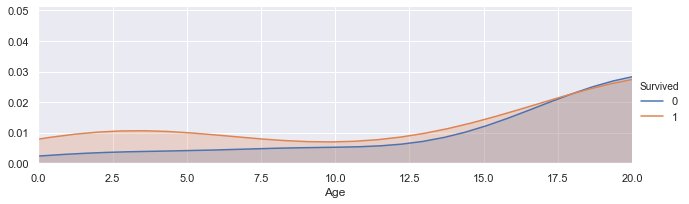

In [1003]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 30)

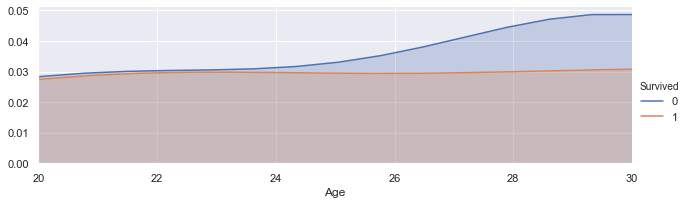

In [1004]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30, 40)

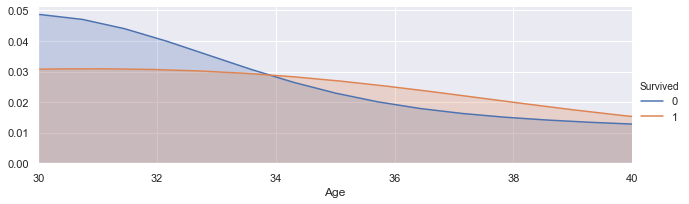

In [1005]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40, 60)

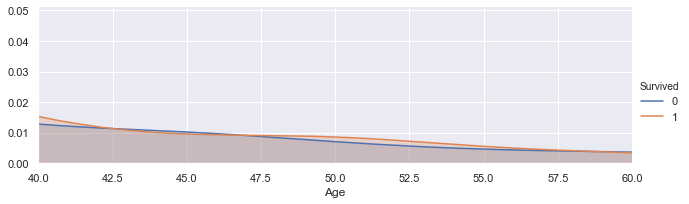

In [1006]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

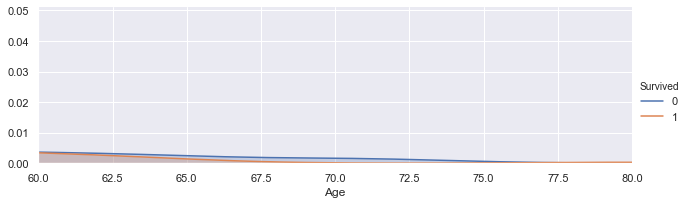

In [1007]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

In [1008]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(7), object(3)
memory usage: 83.6+ KB


In [1009]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Title          418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 36.0+ KB


#### Merging Numerical " AGE" into Categorical Variable [Child:0, young:1, adult:2, mid-age:3, senior:4]

In [1010]:
for dataset in train_test_data:
 dataset.loc[  dataset ['Age'] <=16,'Age'] = 0,
 dataset.loc[ (dataset ['Age'] >16) & (dataset['Age']<=26),'Age']=1,
 dataset.loc[ (dataset ['Age'] >26) & (dataset['Age']<=36),'Age']=2,
 dataset.loc[ (dataset ['Age'] >36) & (dataset['Age']<=62),'Age']=3,
 dataset.loc[  dataset ['Age'] >62,'Age'] = 4 

In [1011]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


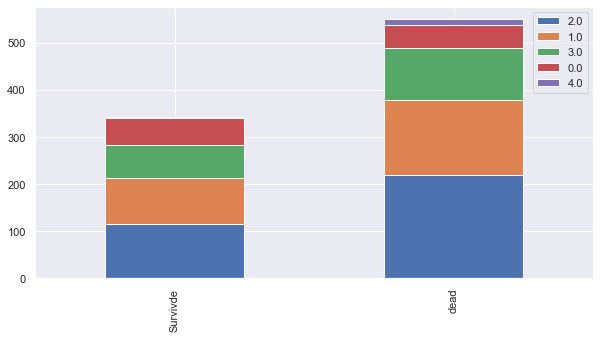

In [1012]:
bar_chart('Age')

#### Embarked Filling the missing values

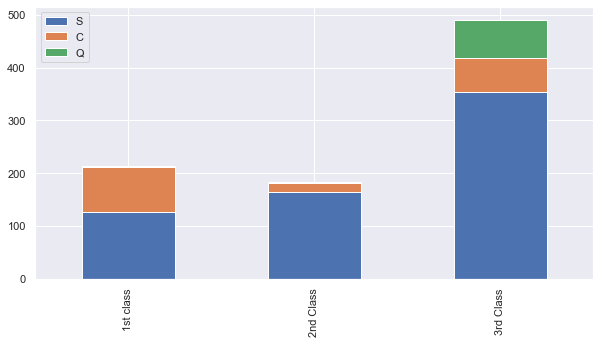

In [1013]:
Pclass1= train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2= train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3= train[train['Pclass']==3]['Embarked'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index =['1st class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

#### More than 50% are from S in every category

In [1014]:
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].fillna('S')

In [1015]:
embarked_mapping = { 'S':0, 'C':1 , 'Q': 2}
for dataset in train_test_data:
    dataset['Embarked']=dataset['Embarked'].map(embarked_mapping)

In [1016]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


#### FARE

In [1017]:
train['Fare'].fillna(train.groupby('Title')['Fare'].transform('median'), inplace=True)
test['Fare'].fillna(test.groupby('Title')['Fare'].transform('median'), inplace = True)

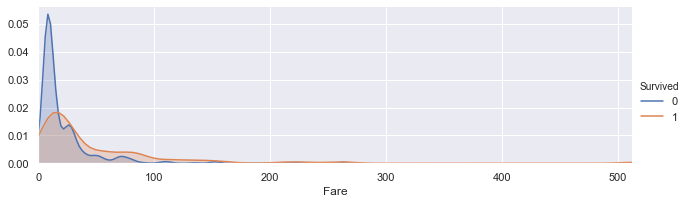

In [1018]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0,train['Fare'].max()))
facet.add_legend()
plt.show()

(0, 20)

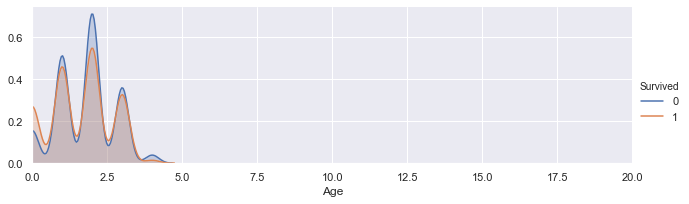

In [1019]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(0,20)

(20, 30)

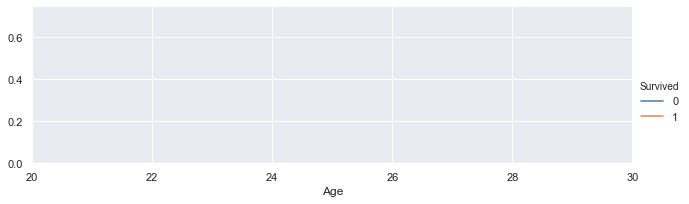

In [1020]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(20,30)

(30, 40)

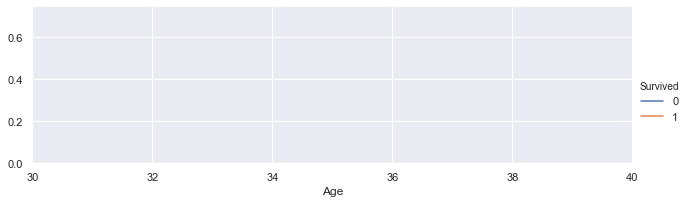

In [1021]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(30,40)

(40, 60)

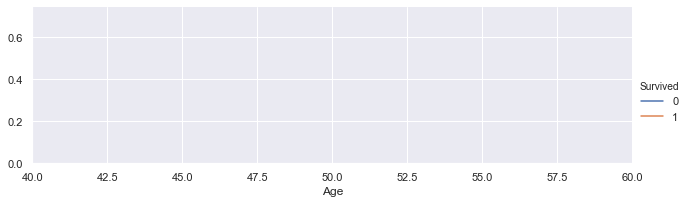

In [1022]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(40,60)

(60, 80)

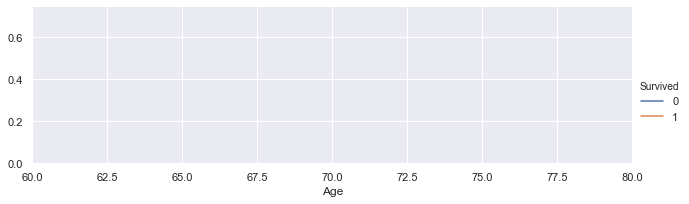

In [1023]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0,train['Age'].max()))
facet.add_legend()
plt.xlim(60,80)

#### Merging Numerical " FARE" into Categorical Variable

In [1024]:
for dataset in train_test_data:
 dataset.loc[  dataset ['Fare'] <=17,'Fare'] = 0,
 dataset.loc[ (dataset ['Fare'] >17) & (dataset['Fare']<=30),'Fare']=1,
 dataset.loc[ (dataset ['Fare'] >30) & (dataset['Fare']<=100),'Fare']=2,
 dataset.loc[  dataset ['Fare'] >100,'Fare'] = 3 

In [1025]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,2.0,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,2.0,C123,0,2
4,5,0,3,0,2.0,0,0,373450,0.0,NaN,0,0


In [1026]:
train.Cabin.value_counts()

C23 C25 C27        4
B96 B98            4
G6                 4
C22 C26            3
F2                 3
E101               3
F33                3
D                  3
C78                2
D26                2
E44                2
D33                2
C2                 2
C52                2
C126               2
D17                2
C123               2
D20                2
E33                2
B57 B59 B63 B66    2
C92                2
E67                2
C83                2
F G73              2
B51 B53 B55        2
E121               2
E24                2
B18                2
B77                2
E25                2
                  ..
A7                 1
B42                1
C91                1
D6                 1
C128               1
A24                1
C110               1
E77                1
D46                1
C30                1
B37                1
C70                1
B101               1
D7                 1
D9                 1
A20                1
C86          

In [1027]:
for dataset in train_test_data:
    dataset['Cabin']= dataset['Cabin'].str[:1]

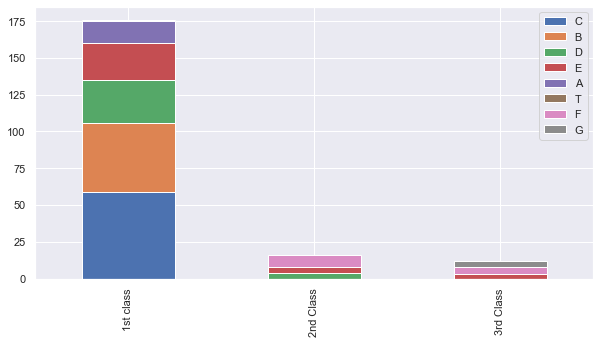

In [1028]:
Pclass1= train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2= train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3= train[train['Pclass']==3]['Cabin'].value_counts()
df=pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index =['1st class','2nd Class','3rd Class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [1029]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"E":1.6,"F":2,"G":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [1030]:
train['Cabin'].fillna(train.groupby('Pclass')['Cabin'].transform('median'), inplace=True)
test['Cabin'].fillna(test.groupby('Pclass')['Cabin'].transform('median'), inplace = True)

#### Family Size

In [1031]:
train['FamilySize']= train['SibSp']+train['Parch']+1
test['FamilySize']= test['SibSp']+test['Parch']+1

(0, 11.0)

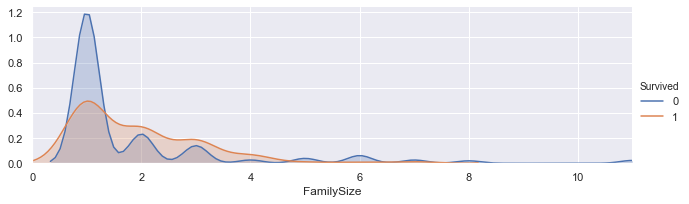

In [1032]:
facet = sns.FacetGrid(train, hue='Survived', aspect=3)
facet.map(sns.kdeplot,'FamilySize',shade=True)
facet.set(xlim=(0,train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [1033]:
family_mapping ={1:0, 2:0.4, 3:0.8, 4:1.2, 5:1.6, 6:2, 7:2.4, 8:2.8, 9:3.2, 10:3.6, 11:4}
for dataset in train_test_data:
 dataset['FamilySize']= dataset['FamilySize'].map(family_mapping)

In [1034]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [1035]:
Features_drop=['Ticket','SibSp','Parch']
train=train.drop(Features_drop, axis=1)
test=test.drop(Features_drop, axis=1)
train=train.drop('PassengerId', axis=1)

In [1036]:
train_data=train.drop('Survived',axis=1)
target=train['Survived']

train_data.shape, target.shape

((891, 8), (891,))

In [1037]:
train_data.head(10)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0
5,3,0,2.0,0.0,2.0,2,0,0.0
6,1,0,3.0,2.0,1.6,0,0,0.0
7,3,0,0.0,1.0,2.0,0,3,1.6
8,3,1,2.0,0.0,2.0,0,2,0.8
9,2,1,0.0,2.0,1.8,1,2,0.4


## Modeling

In [1038]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [1039]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Sex           891 non-null int64
Age           891 non-null float64
Fare          891 non-null float64
Cabin         891 non-null float64
Embarked      891 non-null int64
Title         891 non-null int64
FamilySize    891 non-null float64
dtypes: float64(4), int64(5)
memory usage: 62.7 KB


### Cross Validation ( K-Fold)

In [1040]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### kNN

In [1041]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


In [1043]:
round(np.mean(score)*100,2)

82.6

### DecisionTree

In [1046]:
clf = DecisionTreeClassifier()
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)


[0.76666667 0.80898876 0.78651685 0.7752809  0.88764045 0.76404494
 0.83146067 0.82022472 0.74157303 0.78651685]


In [1047]:
round(np.mean(score)*100,2)

79.69

### RandomForest

In [1049]:
clf = RandomForestClassifier(n_estimators=13)
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.76666667 0.84269663 0.80898876 0.79775281 0.85393258 0.79775281
 0.83146067 0.82022472 0.7752809  0.80898876]


In [1050]:
round(np.mean(score)*100,2)

81.04

### Navie Bayes

In [1051]:
clf = GaussianNB()
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.85555556 0.73033708 0.75280899 0.75280899 0.70786517 0.80898876
 0.76404494 0.80898876 0.86516854 0.83146067]


In [1052]:
round(np.mean(score)*100,2)

78.78

### SVM

In [1054]:
clf = SVC()
scoring='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

C:\Users\dell 7440\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell 7440\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell 7440\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\dell 7440\Anaconda3\lib\site-packages\sklearn\svm\base.py:

[0.83333333 0.80898876 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.83146067 0.86516854]


In [1055]:
round(np.mean(score)*100,2)

83.5

### We get highest accuracy from SVM 

In [1056]:
clf=SVC()
clf.fit(train_data, target)

test_data=test.drop("PassengerId",axis=1).copy()
prediction = clf.predict(test_data)

C:\Users\dell 7440\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [1070]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"], "Survived": prediction
})

submission.to_csv('Sharyarsubmission.csv',index=False)

In [1071]:
submission = pd.read_csv('Sharyarsubmission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [1072]:
submission['Survived'].value_counts()

0    257
1    161
Name: Survived, dtype: int64